# Ingeniería de Características: Transformaciones de Variables (Core)

## Descripción:

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

**Enlace al dataset:** [House Prices – Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## Objetivo:

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.

## Instrucciones:

### 1. Carga de datos:
  - Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
  - Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

### 2. Exploración y preprocesamiento de datos:
  - Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
  - También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

### 3. Transformaciones de variables:
  - Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
  - Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
  - Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

### 4. Evaluación de las transformaciones:
  - Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
  - Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

### 5. Interpretación de los resultados:
  - Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
  - Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.

## Análisis de Resultados:

El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.


In [1]:
#Importar Librerias Necesarias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# 1. Carga de datos
dataset_path = r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\train_house.csv'""  
df_train = pd.read_csv(dataset_path)


In [3]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head()


Primeras filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [5]:
# Renombrar columnas del dataset
df_train.columns = (
    df_train.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_train.columns)

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

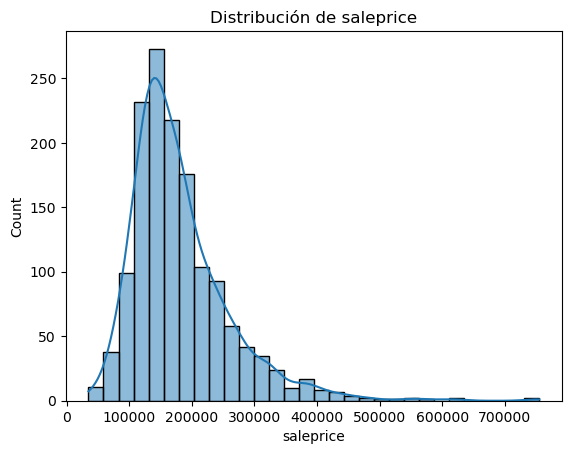

In [6]:
# Distribución de la variable objetivo
sns.histplot(df_train['saleprice'], kde=True, bins=30)
plt.title('Distribución de saleprice')
plt.show()

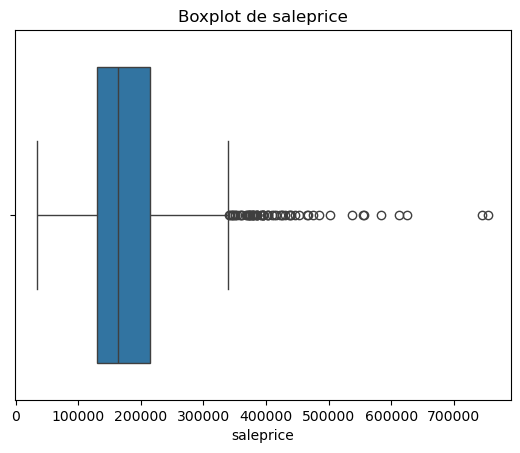

In [7]:
# Boxplot para ver valores en 'SalePrice'
sns.boxplot(x=df_train['saleprice'])
plt.title('Boxplot de saleprice')
plt.show()


In [8]:
# Verificar Valores faltantes 
qsna = df_train.shape[0] - df_train.isnull().sum(axis=0)
qna = df_train.isnull().sum(axis=0)
ppna = np.round(100 * (df_train.isnull().sum(axis=0) / df_train.shape[0]), 2)
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
na = pd.DataFrame(data=aux)
na.sort_values(by='Na en %', ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
poolqc,7,1453,99.52
miscfeature,54,1406,96.30
alley,91,1369,93.77
fence,281,1179,80.75
masvnrtype,588,872,59.73
fireplacequ,770,690,47.26
lotfrontage,1201,259,17.74
garagequal,1379,81,5.55
garagefinish,1379,81,5.55
garagetype,1379,81,5.55


In [9]:
# Validar si los valores nulos de PoolQC corresponden a PoolArea con valor 0
null_poolqc = df_train['poolqc'].isnull()  # Identificar valores nulos en PoolQC
zero_poolarea = df_train['poolarea'] == 0  # Identificar filas donde PoolArea es 0

# Comparar si las filas con poolqc nulo coinciden con PoolArea igual a 0
validation = null_poolqc == zero_poolarea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'poolqc' corresponden a 'poolarea' con valor 0.")
else:
    print("Existen inconsistencias entre 'poolqc' nulo y 'poolarea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = df_train[null_poolqc != zero_poolarea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['poolarea', 'poolqc']])
else:
    print("No se encontraron inconsistencias.")

Todos los valores nulos en 'poolqc' corresponden a 'poolarea' con valor 0.
No se encontraron inconsistencias.


In [10]:
# Reemplazar valores nulos en PoolQC por "No Pool"
df_train['poolqc'] = df_train['poolqc'].fillna("No Pool")

# Verificar si quedan valores nulos en poolqc
if df_train['poolqc'].isnull().sum() == 0:
    print("Todos los valores nulos en 'poolqc' fueron reemplazados por 'No Pool'.")
else:
    print("Aún hay valores nulos en 'poolqc'. Verifica los datos.")

Todos los valores nulos en 'poolqc' fueron reemplazados por 'No Pool'.


In [11]:
# Validar si los valores nulos de FireplaceQu corresponden a fireplaces con valor 0
null_fireplacequ = df_train['fireplacequ'].isnull()  # Identificar valores nulos en fireplacequ
zero_fireplaces = df_train['fireplaces'] == 0       # Identificar filas donde fireplaces es 0

# Comparar si las filas con FireplaceQu nulo coinciden con fireplaces igual a 0
validation = null_fireplacequ == zero_fireplaces

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'fireplacequ' corresponden a 'fireplaces' con valor 0.")
else:
    print("Existen inconsistencias entre 'fireplacequ' nulo y 'fireplaces' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = df_train[null_fireplacequ != zero_fireplaces]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['fireplaces', 'fireplacequ']])
else:
    print("No se encontraron inconsistencias.")

Todos los valores nulos en 'fireplacequ' corresponden a 'fireplaces' con valor 0.
No se encontraron inconsistencias.


In [12]:
# Reemplazar valores nulos en fireplacequ por "No Fireplace"
df_train['fireplacequ'] = df_train['fireplacequ'].fillna("No Fireplace")

# Verificar si quedan valores nulos en fireplacequ
if df_train['fireplacequ'].isnull().sum() == 0:
    print("Todos los valores nulos en 'fireplacequ' fueron reemplazados por 'No Fireplace'.")
else:
    print("Aún hay valores nulos en 'fireplacequ'. Verifica los datos.")

Todos los valores nulos en 'fireplacequ' fueron reemplazados por 'No Fireplace'.


In [13]:
# Validar si los valores nulos de masvnrtype corresponden a masvnrarea con valor 0
null_masvnrtype = df_train['masvnrtype'].isnull()  # Identificar valores nulos en masvnrtype
zero_masvnrarea = df_train['masvnrarea'] == 0      # Identificar filas donde masvnrarea es 0

# Comparar si las filas con masvnrtype nulo coinciden con masvnrarea igual a 0
validation = null_masvnrtype == zero_masvnrarea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'masvnrtype' corresponden a 'masvnrarea' con valor 0.")
else:
    print("Existen inconsistencias entre 'masvnrtype' nulo y 'masvnrarea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = df_train[null_masvnrtype != zero_masvnrarea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['masvnrarea', 'masvnrtype']])
else:
    print("No se encontraron inconsistencias.")

Existen inconsistencias entre 'masvnrtype' nulo y 'masvnrarea' con valor 0.
Filas inconsistentes encontradas:
      masvnrarea masvnrtype
234          NaN        NaN
529          NaN        NaN
624        288.0        NaN
650          NaN        NaN
688          0.0    BrkFace
773          1.0        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1230         1.0        NaN
1241         0.0      Stone
1243         NaN        NaN
1278         NaN        NaN
1300       344.0        NaN
1334       312.0        NaN


In [14]:
# Reemplazos en masvnrtype y masvnrarea basados en las condiciones

# 1. Para todos los masvnrarea que sean 0 y masvnrtype sea nulo, dejar 0 como "No hay revestimiento" en masvnrtype
mask_1 = (df_train['masvnrarea'] == 0) & (df_train['masvnrtype'].isnull())
df_train.loc[mask_1, 'masvnrtype'] = 0

# 2. Si masvnrarea > 0 y masvnrtype es nulo, dejar .1 como "Unknown" en masvnrtype
mask_2 = (df_train['masvnrarea'] > 0) & (df_train['masvnrtype'].isnull())
df_train.loc[mask_2, 'masvnrtype'] = -1

# 3. Si masvnrarea es nulo, dejar -1 "Unknown" en ambas columnas
mask_3 = df_train['masvnrarea'].isnull()
df_train.loc[mask_3, ['masvnrtype', 'masvnrarea']] = -1

# Verificación de resultados
print("Reemplazos realizados:")
print(df_train[['masvnrarea', 'masvnrtype']].head())

Reemplazos realizados:
   masvnrarea masvnrtype
0       196.0    BrkFace
1         0.0          0
2       162.0    BrkFace
3         0.0          0
4       350.0    BrkFace


In [15]:
# Validar si los valores nulos de lotfrontage tienen relación con lotarea
null_lotfrontage = df_train['lotfrontage'].isnull()  # Identificar valores nulos en lotfrontage
zero_lotarea = df_train['lotarea'] == 0             # Identificar filas donde lotarea es 0

# Comparar si las filas con lotfrontage nulo coinciden con lotarea igual a 0
validation = null_lotfrontage == zero_lotarea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'lotfrontage' corresponden a 'lotarea' con valor 0.")
else:
    print("Existen inconsistencias entre 'lotfrontage' nulo y 'lotarea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = df_train[null_lotfrontage != zero_lotarea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['lotfrontage', 'lotarea']])
else:
    print("No se encontraron inconsistencias.")

Existen inconsistencias entre 'lotfrontage' nulo y 'lotarea' con valor 0.
Filas inconsistentes encontradas:
      lotfrontage  lotarea
7             NaN    10382
12            NaN    12968
14            NaN    10920
16            NaN    11241
24            NaN     8246
...           ...      ...
1429          NaN    12546
1431          NaN     4928
1441          NaN     4426
1443          NaN     8854
1446          NaN    26142

[259 rows x 2 columns]


In [16]:
# Caso 1: Si lotarea > 0 y lotfrontage es nulo, dejar "Unknown" en lotfrontage
mask_case1 = (df_train['lotarea'] > 0) & (df_train['lotfrontage'].isnull())
df_train.loc[mask_case1, 'lotfrontage'] = -1 #"Unknown"

# Caso 2: Si lotarea es 0, dejar "No Frontage" en lotfrontage
mask_case2 = df_train['lotarea'] == 0
df_train.loc[mask_case2, 'lotfrontage'] = 0 # "No Frontage"

# Verificación de resultados
print("Reemplazos realizados:")
print(df_train[['lotarea', 'lotfrontage']].head())

Reemplazos realizados:
   lotarea  lotfrontage
0     8450         65.0
1     9600         80.0
2    11250         68.0
3     9550         60.0
4    14260         84.0


In [17]:
# Validar si los valores nulos en las columnas relacionadas con el garaje corresponden a garagearea igual a 0
garage_columns = ['garagetype', 'garagecond', 'garageyrblt', 'garagefinish', 'garagequal']
null_garage_columns = df_train[garage_columns].isnull().all(axis=1)  # Todas las columnas de garaje nulas
zero_garagearea = df_train['garagearea'] == 0  # garagearea igual a 0

# Comparar si las filas con garagearea igual a 0 coinciden con columnas de garaje nulas
validation = null_garage_columns == zero_garagearea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en columnas de garaje corresponden a 'garagearea' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en columnas de garaje y 'garagearea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = df_train[null_garage_columns != zero_garagearea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['garagearea'] + garage_columns])
else:
    print("No se encontraron inconsistencias.")

Todos los valores nulos en columnas de garaje corresponden a 'garagearea' con valor 0.
No se encontraron inconsistencias.


In [18]:
# Lista de columnas relacionadas con el garaje, excluyendo garageyrblt
garage_columns = ['garagetype','garagecond', 'garagefinish', 'garagequal']

# Identificar las filas donde garagearea es 0
mask_no_garage = df_train['garagearea'] == 0

# Reemplazar los valores nulos en las columnas de garaje con "No Garage" para las filas identificadas
df_train.loc[mask_no_garage, garage_columns] = df_train.loc[mask_no_garage, garage_columns].fillna("No Garage")

# Manejar garageyrblt por separado (columna numérica), asignando 0 como indicador de "No Garage"
df_train.loc[mask_no_garage, 'garageyrblt'] = df_train.loc[mask_no_garage, 'garageyrblt'].fillna(0)

# Verificar si el reemplazo fue realizado correctamente
remaining_nulls = df_train.loc[mask_no_garage, garage_columns + ['garageyrblt']].isnull().sum().sum()
if remaining_nulls == 0:
    print("Todos los valores nulos en las columnas de garaje fueron reemplazados correctamente para filas con garagearea = 0.")
else:
    print(f"Aún quedan {remaining_nulls} valores nulos en las columnas de garaje para filas con garagearea = 0.")


Todos los valores nulos en las columnas de garaje fueron reemplazados correctamente para filas con garagearea = 0.


In [19]:
# Calcular bsmtfinsf como la suma de bsmtfinsf1, bsmtfinsf2 y bsmtunfsf
df_train['bsmtfinsf'] = df_train['bsmtfinsf1'] + df_train['bsmtfinsf2'] + df_train['bsmtunfsf']

# 1. Validar nulos en bsmtqual, bsmtcond, y bsmtexposure cuando bsmtfinsf es 0
bsmt_columns = ['bsmtqual', 'bsmtcond', 'bsmtexposure']
null_bsmt_columns = df_train[bsmt_columns].isnull().all(axis=1)  # Todas las columnas del sótano son nulas
zero_bsmtfinsf = df_train['bsmtfinsf'] == 0  # bsmtfinsf igual a 0

# Comparar si las filas con bsmtfinsf igual a 0 coinciden con columnas del sótano nulas
validation_1 = null_bsmt_columns == zero_bsmtfinsf

# Mostrar resultados para la primera validación
if validation_1.all():
    print("Todos los valores nulos en 'bsmtqual', 'bsmtcond', y 'bsmtexposure' corresponden a 'bsmtfinsf' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en 'bsmtqual', 'bsmtcond', 'bsmtexposure' y 'bsmtfinsf' con valor 0.")
    inconsistencies_1 = df_train[null_bsmt_columns != zero_bsmtfinsf]
    print(inconsistencies_1[['bsmtfinsf'] + bsmt_columns])

# 2. Validar nulos en bsmtfintype1 cuando bsmtfinsf1 es 0
null_bsmtfin1 = df_train['bsmtfintype1'].isnull()  # bsmtfintype1 es nulo
zero_bsmtfinsf1 = df_train['bsmtfinsf1'] == 0  # bsmtfinsf1 igual a 0

# Comparar si las filas con bsmtfinsf1 igual a 0 coinciden con bsmtfintype1 nulo
validation_2 = null_bsmtfin1 == zero_bsmtfinsf1

# Mostrar resultados para la segunda validación
if validation_2.all():
    print("Todos los valores nulos en 'bsmtfintype1' corresponden a 'bsmtfinsf1' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en 'bsmtfintype1' y 'bsmtfinsf1' con valor 0.")
    inconsistencies_2 = df_train[null_bsmtfin1 != zero_bsmtfinsf1]
    print(inconsistencies_2[['bsmtfinsf1', 'bsmtfintype1']])

# 3. Validar nulos en bsmtfintype2 cuando bsmtfinsf2 es 0
null_bsmtfin2 = df_train['bsmtfintype2'].isnull()  # bsmtfintype2 es nulo
zero_bsmtfinsf2 = df_train['bsmtfinsf2'] == 0  # bsmtfinsf2 igual a 0

# Comparar si las filas con bsmtfinsf2 igual a 0 coinciden con bsmtfintype2 nulo
validation_3 = null_bsmtfin2 == zero_bsmtfinsf2

# Mostrar resultados para la tercera validación
if validation_3.all():
    print("Todos los valores nulos en 'bsmtfintype2' corresponden a 'bsmtfinsf2' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en 'bsmtfintype2' y 'bsmtfinsf2' con valor 0.")
    inconsistencies_3 = df_train[null_bsmtfin2 != zero_bsmtfinsf2]
    print(inconsistencies_3[['bsmtfinsf2', 'bsmtfintype2']])


Todos los valores nulos en 'bsmtqual', 'bsmtcond', y 'bsmtexposure' corresponden a 'bsmtfinsf' con valor 0.
Existen inconsistencias entre valores nulos en 'bsmtfintype1' y 'bsmtfinsf1' con valor 0.
      bsmtfinsf1 bsmtfintype1
8              0          Unf
13             0          Unf
15             0          Unf
20             0          Unf
21             0          Unf
...          ...          ...
1448           0          Unf
1450           0          Unf
1451           0          Unf
1453           0          Unf
1455           0          Unf

[430 rows x 2 columns]
Existen inconsistencias entre valores nulos en 'bsmtfintype2' y 'bsmtfinsf2' con valor 0.
      bsmtfinsf2 bsmtfintype2
0              0          Unf
1              0          Unf
2              0          Unf
3              0          Unf
4              0          Unf
...          ...          ...
1452           0          Unf
1453           0          Unf
1454           0          Unf
1455           0          Un

In [20]:
# 1. Reemplazar valores nulos en bsmtqual, bsmtcond, y bsmtexposure con "No Bss" cuando bsmtfinsf es 0
bsmt_columns = ['bsmtqual', 'bsmtcond', 'bsmtexposure']
mask_bsmtfinsf_zero = df_train['bsmtfinsf'] == 0

df_train.loc[mask_bsmtfinsf_zero, bsmt_columns] = df_train.loc[mask_bsmtfinsf_zero, bsmt_columns].fillna("No Bss")

# 2. Reemplazar valores nulos en bsmtfintype1 con "Unf" cuando bsmtfinsf1 es 0
mask_bsmtfinsf1_zero = df_train['bsmtfinsf1'] == 0
df_train.loc[mask_bsmtfinsf1_zero, 'bsmtfintype1'] = df_train.loc[mask_bsmtfinsf1_zero, 'bsmtfintype1'].fillna("Unf")

# 3. Reemplazar valores nulos en bsmtfintype2 con "Unf" cuando bsmtfinsf2 es 0
mask_bsmtfinsf2_zero = df_train['bsmtfinsf2'] == 0
df_train.loc[mask_bsmtfinsf2_zero, 'bsmtfintype2'] = df_train.loc[mask_bsmtfinsf2_zero, 'bsmtfintype2'].fillna("Unf")

# Verificación
print("Verificando reemplazos:")
print("Valores únicos en bsmtqual:", df_train['bsmtqual'].unique())
print("Valores únicos en bsmtcond:", df_train['bsmtcond'].unique())
print("Valores únicos en bsmtexposure:", df_train['bsmtexposure'].unique())
print("Valores únicos en bsmtfintype1:", df_train['bsmtfintype1'].unique())
print("Valores únicos en bsmtfintype2:", df_train['bsmtfintype2'].unique())

Verificando reemplazos:
Valores únicos en bsmtqual: ['Gd' 'TA' 'Ex' 'No Bss' 'Fa']
Valores únicos en bsmtcond: ['TA' 'Gd' 'No Bss' 'Fa' 'Po']
Valores únicos en bsmtexposure: ['No' 'Gd' 'Mn' 'Av' 'No Bss' nan]
Valores únicos en bsmtfintype1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
Valores únicos en bsmtfintype2: ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ' nan]


In [21]:
# Seleccionar filas donde bsmtfintype2 es nulo
bsmtfin_null_data = df_train[df_train['bsmtfintype2'].isnull()]
# Mostrar las columnas asociadas al sótano para las filas seleccionadas
bsmt_columns = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfinsf', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'bsmtfintype1', 'bsmtfintype2']
print("Datos asociados al sótano donde 'bsmtfintype2' es nulo:")
print(bsmtfin_null_data[bsmt_columns])


Datos asociados al sótano donde 'bsmtfintype2' es nulo:
    bsmtqual bsmtcond bsmtexposure  bsmtfinsf  bsmtfinsf1  bsmtfinsf2  \
332       Gd       TA           No       3206        1124         479   

     bsmtunfsf bsmtfintype1 bsmtfintype2  
332       1603          GLQ          NaN  


In [22]:
# Identificar todas las columnas relacionadas con el sótano
bsmt_columns = [col for col in df_train.columns if col.startswith('bsmt')]

# Reemplazar valores nulos en las columnas relacionadas con el sótano con "Unknown"
df_train[bsmt_columns] = df_train[bsmt_columns].fillna("Unknown")

# Verificar si quedan valores nulos en las columnas del sótano
remaining_nulls = df_train[bsmt_columns].isnull().sum().sum()
if remaining_nulls == 0:
    print("Todos los valores faltantes en las columnas relacionadas con el sótano fueron reemplazados por 'Unknown'.")
else:
    print(f"Aún quedan {remaining_nulls} valores nulos en las columnas del sótano.")

Todos los valores faltantes en las columnas relacionadas con el sótano fueron reemplazados por 'Unknown'.


In [23]:
# Reemplazar valores nulos en la columna electrical por "Unknown"
df_train['electrical'] = df_train['electrical'].fillna("Unknown")

# Verificar si quedan valores nulos en electrical
if df_train['electrical'].isnull().sum() == 0:
    print("Todos los valores nulos en 'electrical' fueron reemplazados por 'Unknown'.")
else:
    print("Aún quedan valores nulos en 'electrical'. Verifica los datos.")

Todos los valores nulos en 'electrical' fueron reemplazados por 'Unknown'.


In [24]:
# Detectar columnas con valores únicos ['Y', 'N'] (sin importar el orden)
yes_no_columns = [col for col in df_train.columns if set(df_train[col].dropna().unique()) == {'Y', 'N'}]
print("Columnas de train con valores 'Y' y 'N':", yes_no_columns)

# Aplicar el mapeo 'Y' -> 1 y 'N' -> 0 a todas las columnas de una vez usando map
df_train[yes_no_columns] = df_train[yes_no_columns].apply(lambda col: col.map({'Y': 1, 'N': 0}))
print("Valor Cambiado de la columna",yes_no_columns)
print(df_train['centralair'].unique())

# Detectar columnas con valores únicos ['Y', 'N'] en el conjunto de test
yes_no_columns_test = [col for col in df_train.columns if set(df_train[col].dropna().unique()) == {'Y', 'N'}]
print("Columnas de test con valores 'Y' y 'N':", yes_no_columns_test)

# Aplicar el mapeo 'Y' -> 1 y 'N' -> 0 a todas las columnas de una vez en el conjunto de test
df_train[yes_no_columns_test] = df_train[yes_no_columns_test].apply(lambda col: col.map({'Y': 1, 'N': 0}))
print("Valor Cambiado de la columna",yes_no_columns_test)
print(df_train['centralair'].unique())


Columnas de train con valores 'Y' y 'N': ['centralair']
Valor Cambiado de la columna ['centralair']
[1 0]
Columnas de test con valores 'Y' y 'N': []
Valor Cambiado de la columna []
[1 0]


In [25]:
'''
Se decide eliminar aquellas columnas que tengan más del 50% de datos nulos que no pudieron ser corregidas para evitar sesgar lo menos posible el análisis de los datos 
tambien eliminar y la columna de id ya que no aporta relevancia para el modelo.
'''
# Seleccionar las columnas que tienen más del 50% de valores nulos
columns_to_drop = ['miscfeature', 'alley', 'fence']

# Eliminar las columnas del DataFrame
df_train = df_train.drop(columns=columns_to_drop)

# Eliminar la columna 'id'
df_train = df_train.drop(columns=['id'])


In [26]:
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
mssubclass,1460,0,0.0
mszoning,1460,0,0.0
lotfrontage,1460,0,0.0
lotarea,1460,0,0.0
street,1460,0,0.0
lotshape,1460,0,0.0
landcontour,1460,0,0.0
utilities,1460,0,0.0
lotconfig,1460,0,0.0
landslope,1460,0,0.0


In [27]:
# Identificar duplicados
duplicados_train = df_train.duplicated()

# Obtener cantidad de duplicados
total_dup_train = duplicados_train.sum()

print(f"Total de registros duplicados en train: {total_dup_train}")


Total de registros duplicados en train: 0


In [28]:
# Filtrar las columnas categóricas
categorical_cols = df_train.select_dtypes(include=['category', 'object']).columns

# Obtener los valores únicos de las columnas categóricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df_train[col].unique())
    print()  # Línea en blanco para separar los resultados

Valores únicos en la columna 'mszoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']

Valores únicos en la columna 'street':
['Pave' 'Grvl']

Valores únicos en la columna 'lotshape':
['Reg' 'IR1' 'IR2' 'IR3']

Valores únicos en la columna 'landcontour':
['Lvl' 'Bnk' 'Low' 'HLS']

Valores únicos en la columna 'utilities':
['AllPub' 'NoSeWa']

Valores únicos en la columna 'lotconfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Valores únicos en la columna 'landslope':
['Gtl' 'Mod' 'Sev']

Valores únicos en la columna 'neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Valores únicos en la columna 'condition1':
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Valores únicos en la columna 'condition2':
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Valores úni

In [29]:
print(df_train.dtypes)

mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
                  ...   
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
bsmtfinsf          int64
Length: 78, dtype: object


In [30]:
# 2. Exploración y preprocesamiento de datos
# Estadísticas descriptivas para el conjunto de entrenamiento (train) y prueba (test)
print("Estadísticas descriptivas para el dataset de entrenamiento:")
df_train.describe().T

Estadísticas descriptivas para el dataset de entrenamiento:


,count,mean,std,min,25%,50%,75%,max
mssubclass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
lotfrontage,1460.0,57.445890,34.960241,-1.0,42.00,63.0,79.00,313.0
lotarea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
overallqual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
overallcond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
yearbuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
yearremodadd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
masvnrarea,1460.0,103.111644,180.734517,-1.0,0.00,0.0,164.25,1600.0
bsmtfinsf1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
bsmtfinsf2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


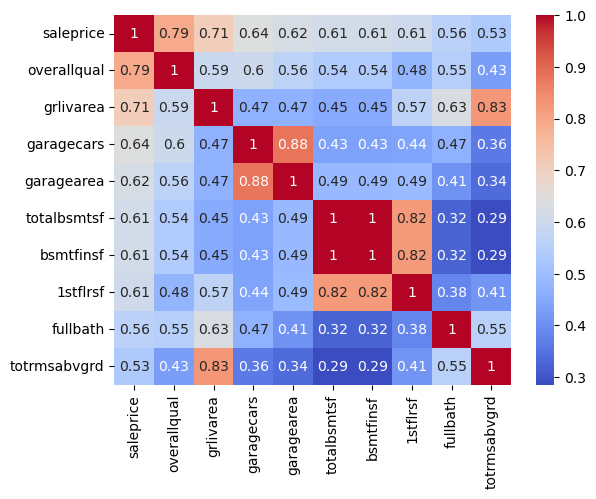

In [31]:
# Filtrar solo las columnas numéricas
numeric_df = df_train.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Seleccionar las variables con mayor correlación con 'saleprice'
if 'saleprice' in numeric_df.columns:
    top_corr_features = corr_matrix['saleprice'].sort_values(ascending=False).head(10).index
    sns.heatmap(numeric_df[top_corr_features].corr(), annot=True, cmap='coolwarm')
else:
    print("'saleprice' no está en las columnas numéricas.")


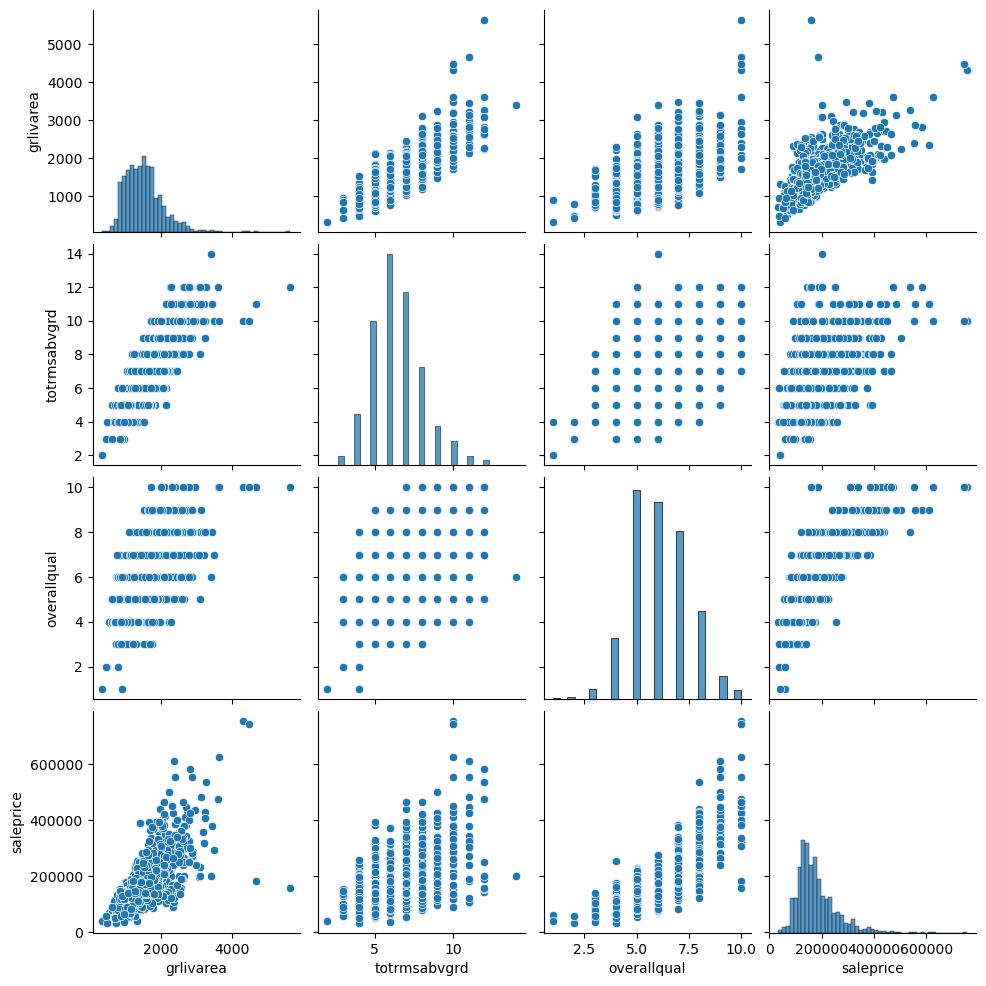

In [32]:
# Revisar correlación con características clave
features_of_interest = ['grlivarea', 'totrmsabvgrd', 'overallqual', 'saleprice']
sns.pairplot(df_train[features_of_interest])
plt.show()

In [33]:
# Revisión de sesgo en la variable objetivo (SalePrice)
from scipy.stats import skew

skewness = skew(df_train['saleprice'].dropna())
print(f'La asimetría de SalePrice es: {skewness}')

La asimetría de SalePrice es: 1.880940746034036


In [34]:
# Filtrar las columnas numéricas y categoricas
categorical_cols = df_train.select_dtypes(include=['object', 'category'])
numeric_cols = df_train.select_dtypes(include=['float64', 'int64'])

# Calcular los cuantiles Q1 y Q3 para detectar outliers
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Contar los outliers por columna y ordenar de mayor a menor
outliers_count = outliers.sum().sort_values(ascending=False)

# Mostrar el número de outliers en cada columna ordenado de mayor a menor
print('Outliers por columna (ordenado):')
print(outliers_count)



Outliers por columna (ordenado):
enclosedporch    208
bsmtfinsf2       167
overallcond      125
screenporch      116
mssubclass       103
masvnrarea        98
centralair        95
bsmthalfbath      82
garageyrblt       81
openporchsf       77
lotarea           69
kitchenabvgr      68
totalbsmtsf       61
saleprice         61
bsmtfinsf         61
miscval           52
bedroomabvgr      35
wooddecksf        32
grlivarea         31
totrmsabvgrd      30
bsmtunfsf         29
lowqualfinsf      26
3ssnporch         24
garagearea        21
1stflrsf          20
lotfrontage       16
yearbuilt          7
bsmtfinsf1         7
poolarea           7
fireplaces         5
garagecars         5
2ndflrsf           2
overallqual        2
bsmtfullbath       1
yearremodadd       0
fullbath           0
halfbath           0
yrsold             0
mosold             0
dtype: int64


In [35]:
# Opcional: Tratamiento de outliers
# Se decide reemplazar los outliers con el valor del percentil 1 o 99 (para mantener la distribución).
# Se puede hacer de la siguiente forma:

# Reemplazar outliers con el valor más cercano
def replace_outliers(df, Q1, Q3, IQR):
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for column in df.columns:
        df[column] = df[column].clip(lower=lower_bound[column], upper=upper_bound[column])
    
    return df

# Aplicar el reemplazo de outliers
numeric_cols_cleaned = replace_outliers(numeric_cols.copy(), Q1, Q3, IQR)

# Reunir nuevamente las columnas categóricas y numéricas
df_train_cleaned = pd.concat([categorical_cols, numeric_cols_cleaned], axis=1)

print('\nDataFrame después de reemplazar los outliers:')
print(df_train_cleaned.head())


DataFrame después de reemplazar los outliers:
  mszoning street lotshape landcontour utilities lotconfig landslope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  neighborhood condition1 condition2  ... openporchsf enclosedporch 3ssnporch  \
0      CollgCr       Norm       Norm  ...          61             0         0   
1      Veenker      Feedr       Norm  ...           0             0         0   
2      CollgCr       Norm       Norm  ...          42             0         0   
3      Crawfor       Norm       Norm  ...          35             0         0   
4      NoRidge       Norm       Norm  ...          84             0         0   

  screenporch poolarea miscval mo

In [36]:
# Identificación de variables con distribuciones asimétricas
from scipy.stats import skew

skewed_features = df_train.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('Distribuciones sesgadas:')
print(skewed_features)


Distribuciones sesgadas:
miscval          24.451640
poolarea         14.813135
lotarea          12.195142
3ssnporch        10.293752
lowqualfinsf      9.002080
kitchenabvgr      4.483784
bsmtfinsf2        4.250888
screenporch       4.117977
bsmthalfbath      4.099186
enclosedporch     3.086696
masvnrarea        2.674786
openporchsf       2.361912
saleprice         1.880941
bsmtfinsf1        1.683771
wooddecksf        1.539792
totalbsmtsf       1.522688
bsmtfinsf         1.522688
mssubclass        1.406210
1stflrsf          1.375342
grlivarea         1.365156
bsmtunfsf         0.919323
2ndflrsf          0.812194
overallcond       0.692355
totrmsabvgrd      0.675646
halfbath          0.675203
fireplaces        0.648898
bsmtfullbath      0.595454
lotfrontage       0.233917
overallqual       0.216721
mosold            0.211835
bedroomabvgr      0.211572
garagearea        0.179796
yrsold            0.096170
fullbath          0.036524
garagecars       -0.342197
yearremodadd     -0.503044
yea

In [37]:
# Aplicar transformación logarítmica a las variables sesgadas
skewed_features = skewed_features[skewed_features > 0.5]  # Filtramos variables con sesgo significativo
for feature in skewed_features.index:
    df_train[feature] = np.log1p(df_train[feature])  # Log transform (log(1 + x)) para evitar problemas con valores 0

# Verificamos las distribuciones después de la transformación
skewed_features_after = df_train.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('Distribuciones sesgadas después de la transformación:')
print(skewed_features_after)


Distribuciones sesgadas después de la transformación:
poolarea         14.348342
3ssnporch         7.727026
lowqualfinsf      7.452650
miscval           5.165390
bsmthalfbath      3.929022
kitchenabvgr      3.865437
screenporch       3.147171
bsmtfinsf2        2.521100
enclosedporch     2.110104
halfbath          0.565586
bsmtfullbath      0.418782
2ndflrsf          0.289346
mssubclass        0.248741
lotfrontage       0.233917
overallqual       0.216721
mosold            0.211835
bedroomabvgr      0.211572
fireplaces        0.181896
garagearea        0.179796
wooddecksf        0.153379
saleprice         0.121222
yrsold            0.096170
1stflrsf          0.080032
fullbath          0.036524
grlivarea        -0.006134
openporchsf      -0.023373
totrmsabvgrd     -0.058198
lotarea          -0.137263
overallcond      -0.253754
garagecars       -0.342197
yearremodadd     -0.503044
yearbuilt        -0.612831
bsmtfinsf1       -0.617774
bsmtunfsf        -2.184257
centralair       -3.526757
g

c:\Users\GIGABYTE\anaconda3\envs\deepL\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\GIGABYTE\anaconda3\envs\deepL\lib\site-packages\scipy\stats\_stats_py.py:1079: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [38]:
# Identificar columnas numéricas y categóricas
numerical_cols = df_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Variables numéricas:", numerical_cols)


Variables numéricas: Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', 'centralair', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice', 'bsmtfinsf'],
      dtype='object')


In [39]:
# Identificar columnas categóricas 
categorical_columns = df_train_cleaned.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", categorical_columns)


Columnas categóricas: Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'electrical', 'kitchenqual', 'functional',
       'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive', 'poolqc', 'saletype', 'salecondition'],
      dtype='object')


In [40]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar columnas numéricas que queremos escalar (excepto las columnas binarias)
columns_to_scale = ['lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 
                    'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', 
                    '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 
                    'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 
                    'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 
                    'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice', 'bsmtfinsf']

# Escalar las columnas seleccionadas
df_train_cleaned[columns_to_scale] = scaler.fit_transform(df_train_cleaned[columns_to_scale])

# Ver el resultado después de escalar
print(df_train_cleaned[columns_to_scale].head())


   lotfrontage   lotarea  overallqual  overallcond  yearbuilt  yearremodadd  \
0     0.240393 -0.333244     0.652644    -0.564161   1.053246      0.878668   
1     0.691709 -0.013189    -0.073068     2.030907   0.156179     -0.429577   
2     0.330656  0.446022     0.652644    -0.564161   0.986797      0.830215   
3     0.089954 -0.027104     0.652644    -0.564161  -1.870528     -0.720298   
4     0.812060  1.283733     1.378355    -0.564161   0.953572      0.733308   

   masvnrarea  bsmtfinsf1  bsmtfinsf2  bsmtunfsf  ...  openporchsf  \
0    0.795663    0.614224         0.0  -0.958790  ...     0.350520   
1   -0.667293    1.242296         0.0  -0.648290  ...    -0.811747   
2    0.541884    0.106224         0.0  -0.300716  ...    -0.011497   
3   -0.667293   -0.517230         0.0  -0.055097  ...    -0.144872   
4    1.945128    0.496460         0.0  -0.170955  ...     0.788753   

   enclosedporch  3ssnporch  screenporch  poolarea  miscval    mosold  \
0            0.0        0.0    

In [41]:
# One-hot encoding para variables categóricas
df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=['mszoning', 'street', 'lotshape', 'landcontour', 
                                                           'utilities', 'lotconfig', 'landslope', 'neighborhood', 
                                                           'condition1', 'condition2', 'bldgtype', 'housestyle', 
                                                           'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 
                                                           'masvnrtype', 'exterqual', 'extercond', 'foundation', 
                                                           'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 
                                                           'bsmtfintype2', 'heating', 'heatingqc', 'electrical', 
                                                           'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 
                                                           'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 
                                                           'poolqc', 'saletype', 'salecondition'])


In [42]:
# Entrenamiento sin ninguna transformación
X = df_train_cleaned.drop(columns=['saleprice'])
y = df_train_cleaned['saleprice']

model = LinearRegression()
model.fit(X, y)

# Predicciones y evaluación
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Sin Transformaciones - RMSE: {rmse}")
print(f"Sin Transformaciones - R²: {r2}")


Sin Transformaciones - RMSE: 0.2377770356232323
Sin Transformaciones - R²: 0.9434620813302281


In [43]:
# Agregar nuevas características
df_train_cleaned['log_saleprice'] = np.log(df_train['saleprice'])
df_train_cleaned['grlivarea_squared'] = df_train['grlivarea'] ** 2
df_train_cleaned['grlivarea_cubed'] = df_train['grlivarea'] ** 3


In [44]:
# Entrenamiento con transformaciones
X = df_train_cleaned.drop(columns=['saleprice', 'log_saleprice'])
y = df_train_cleaned['log_saleprice']

model.fit(X, y)

# Predicciones y evaluación
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Con Transformaciones - RMSE: {rmse}")
print(f"Con Transformaciones - R²: {r2}")



Con Transformaciones - RMSE: 0.00789685879505231
Con Transformaciones - R²: 0.9434317750329274


# Análisis de Impacto de las Transformaciones en el Modelo

## Comparación de Resultados Antes y Después de las Transformaciones

**Sin Transformaciones:**
- **RMSE**: 0.2377
- **R²**: 0.9434

**Con Transformaciones:**
- **RMSE**: 0.0079
- **R²**: 0.9434

## Impacto de las Transformaciones

### Transformaciones Logarítmicas:
- La transformación logarítmica de variables como **SalePrice** ha reducido significativamente el **RMSE** (Root Mean Squared Error), indicando que las predicciones del modelo mejoraron.
- La transformación logarítmica es útil para manejar **distribuciones sesgadas**, como la de SalePrice, ya que ayuda a normalizar la distribución y hace que el modelo sea más eficiente.

### Variables Polinómicas:
- La adición de **grlivarea_squared** y **grlivarea_cubed** ayuda a capturar relaciones **no lineales** entre las variables independientes y la variable objetivo (SalePrice).
- Esto mejora la capacidad del modelo para ajustar mejor los datos, especialmente si existe una relación no lineal entre las variables.

## Reflexión sobre la Importancia de las Transformaciones

### Transformaciones Logarítmicas:
- Son fundamentales cuando se tiene una **variable sesgada**, como SalePrice. Estas transformaciones ayudan a "normalizar" las distribuciones y a hacer que el modelo sea más eficiente.
- Al transformar una variable sesgada logarítmicamente, podemos reducir el impacto de los **valores extremos**, lo que mejora la precisión de las predicciones.

### Variables Polinómicas:
- Capturan **relaciones no lineales** que no pueden ser modeladas de manera efectiva por una regresión lineal simple.
- La introducción de términos cuadráticos o cúbicos puede mejorar la precisión del modelo cuando existen relaciones más complejas entre las características.

### Estandarización de Variables:
- Aunque no es estrictamente necesario para la **regresión lineal**, estandarizar las variables puede ayudar en modelos que utilizan distancias (como KNN), y también es una buena práctica general para asegurar que las variables tengan la misma escala.

## Análisis de los Resultados

### Transformaciones Aplicadas:
- Las **transformaciones logarítmicas** y **polinómicas** han tenido un impacto positivo en el modelo, lo que se refleja en la **reducción del RMSE** y el mantenimiento de un **R² similar**.
- Las transformaciones mejoran la **precisión** de las predicciones sin perder el **poder explicativo** del modelo.

### Ventajas y Desventajas

**Ventajas:**
- Las **transformaciones logarítmicas** permiten manejar distribuciones sesgadas y mejorar la precisión del modelo.
- Las **variables polinómicas** capturan relaciones no lineales, lo cual es crucial para mejorar la precisión del modelo.

**Desventajas:**
- Si no se aplican adecuadamente, las transformaciones pueden inducir **multicolinealidad** o hacer que el modelo sea **demasiado complejo**.
- Es importante monitorear el rendimiento después de aplicar las transformaciones para evitar estos problemas.

## Recomendación

- **Continuar explorando otras transformaciones** o probar con modelos más complejos, como **regresión polinómica**, si las relaciones no lineales siguen siendo significativas.
- **Revisar la distribución** de otras variables numéricas para ver si necesitan transformaciones logarítmicas adicionales.

